In [1]:
from IPython.display import Image

# seaborn
##### matplotlib기반 통계 데이터 시각화에 최적화된 라이브러리
##### 실제 분석에서는 matplotlib과 seaborn을 함께 사용

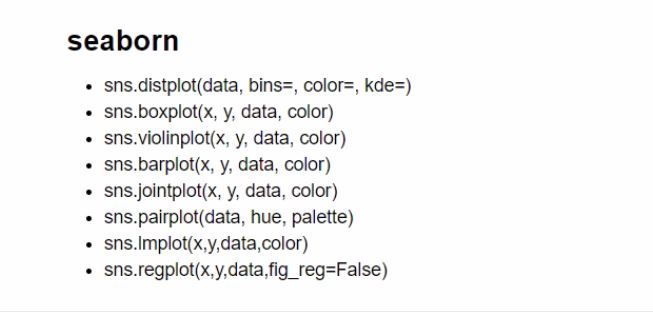

In [2]:
Image("C:/Users/user/Desktop/caba_2015_필기/day24/seaborn.JPG")

In [ ]:
#추가
# sns.heatmap(data,)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# figsize 한 번에 세팅, 가로 10, 세로 6으로 세팅
plt.rc('figure', figsize=(10,6))

In [5]:
tips = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/examples/tips.csv')

In [6]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [201]:
party_counts = pd.crosstab(tips['day'], tips['size'])

#size 2 ~ 5 선택
party_counts = party_counts.loc[:, 2:5]

# 각 열을 합계 1로 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


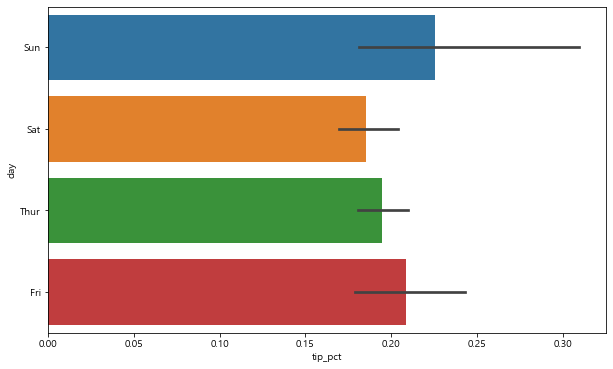

In [205]:
# 요일별 팁의 비중을 시각화
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")

In [206]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

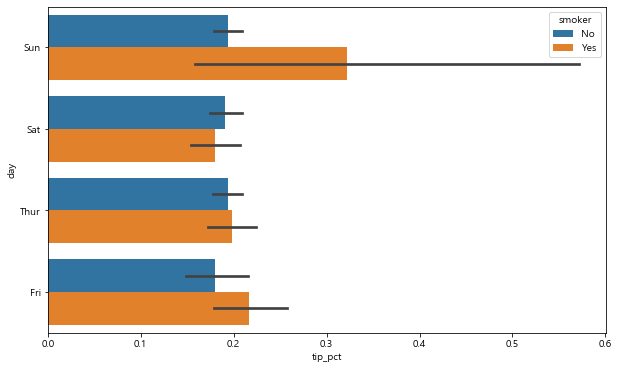

In [262]:
#Hue: x,y 2가지 변수를 입력받아 2차원 형태의 그래프가 그려질 때, 한가지 차원을 더 추가할 수 있다.
# sns.barplot(x='tip_pct',y='day',hue='time',data=tips, orient='h')
sns.barplot(x='tip_pct',y='day',hue='smoker',data=tips, orient='h')

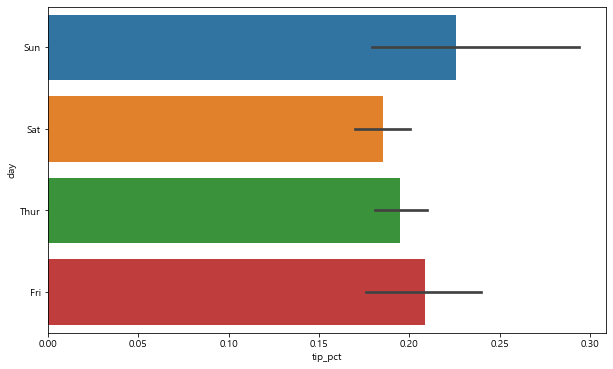

In [211]:
sns.barplot(x='tip_pct',y='day', data=tips, orient='h')

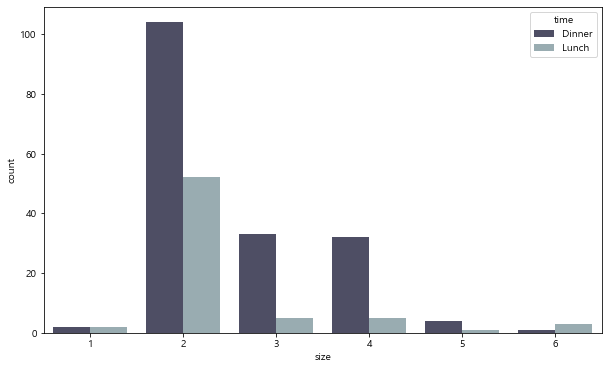

In [215]:
# sns.countplot()
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', hue='time', data=tips, palette='bone')

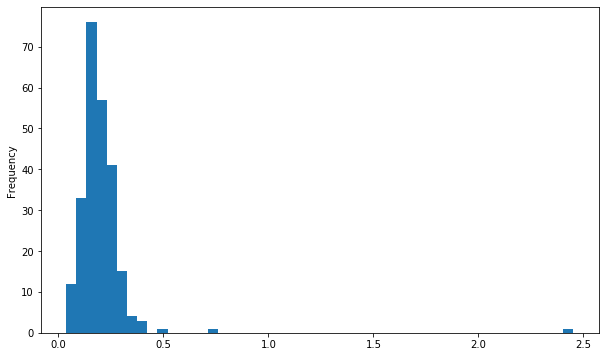

In [18]:
tips['tip_pct'].plot.hist(bins=50)

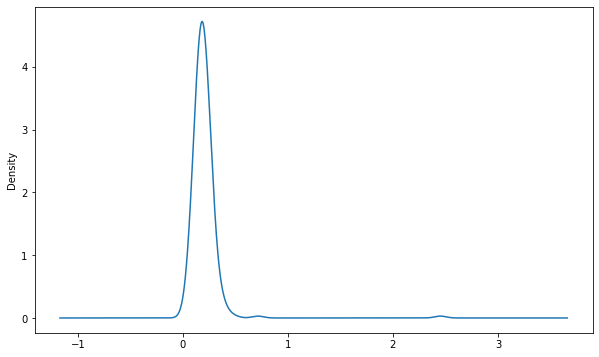

In [25]:
tips.tip_pct.plot.density()

In [216]:
# comp1: 평균 0, 표준편차 1인 '실수'(난수:random number) 200개 생성
# comp2: 평균 10, 표준편차 2인 '실수'(난수:random number) 200개 생성
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.describe()

count    400.000000
mean       5.096151
std        5.253256
min       -3.499548
25%        0.076760
50%        2.774085
75%       10.063642
max       17.206548
dtype: float64

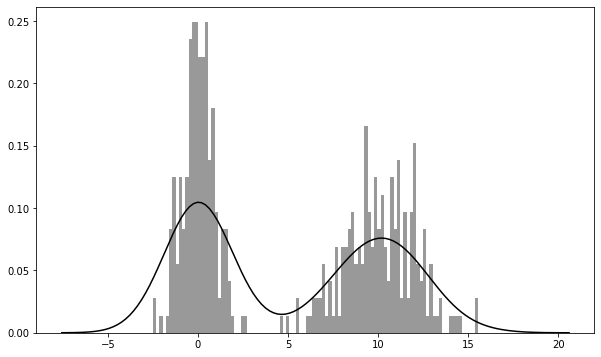

In [29]:
sns.distplot(values, bins=100, color='k')

In [30]:
# 물고기 종류별 몸길이 데이터
fish_multi = pd.read_csv("C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv")

In [223]:
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,10
7,A,5
8,A,5
9,A,6
10,B,2


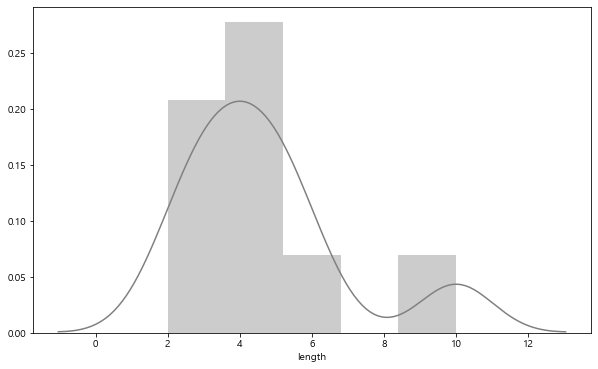

In [224]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.distplot(length_a,color='gray')

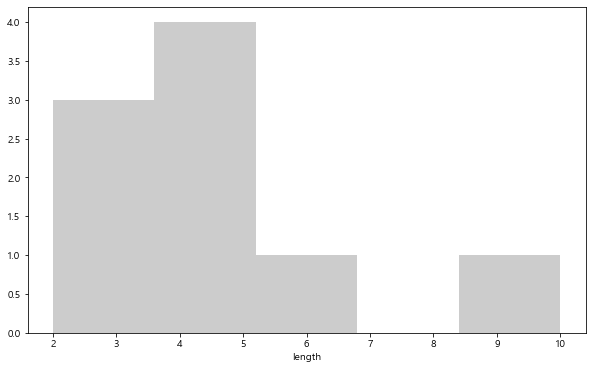

In [225]:
sns.distplot(length_a, bins=5,color='gray',kde=False)

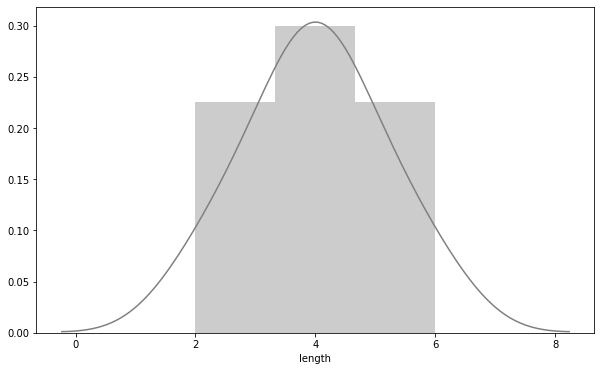

In [34]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']


sns.distplot(length_a, color='gray')

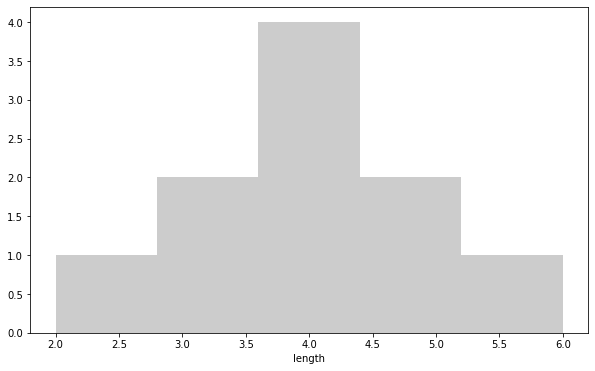

In [35]:
# distplot에서 hist만 나타내고 싶을 때
sns.distplot(length_a, bins=5, color='gray', kde=False)

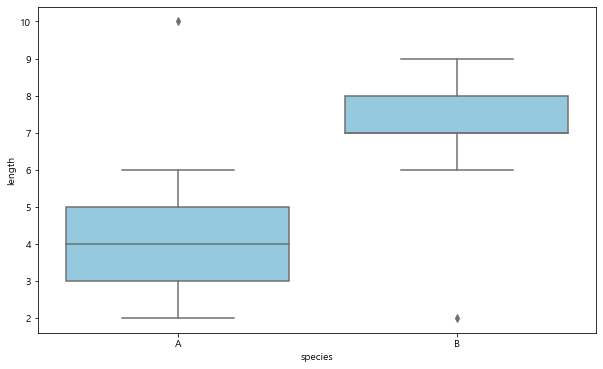

In [226]:
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')

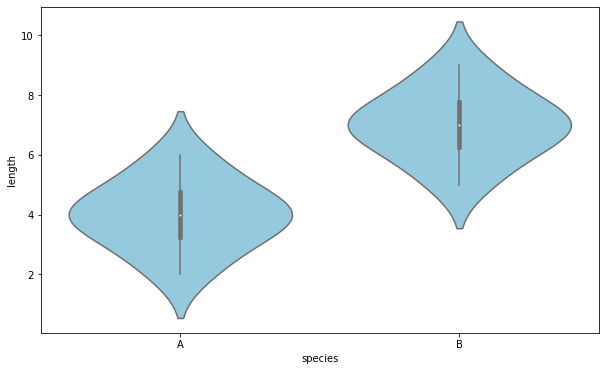

In [37]:
# 바이올린 플롯
# 밀도를 옆으로 보여줌
# 상자그림의 상자 대신 커널밀도추정의 결과를 사용
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

In [238]:
fish_multi = pd.read_csv("C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv")

In [239]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


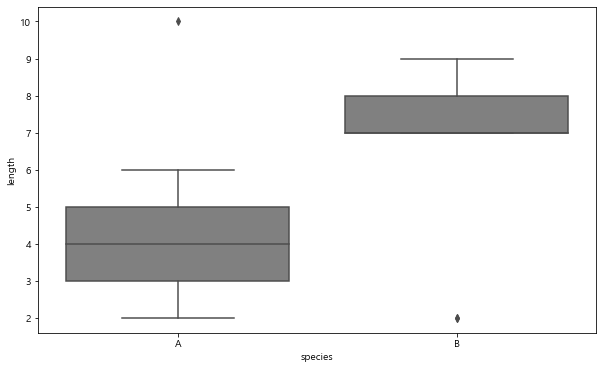

In [229]:
sns.boxplot(x = "species", y  = "length", data = fish_multi, color = 'gray')

In [ ]:
# 다른방법
# Q. fish_multi에서 이상치를 제거한 후 바이올린 플롯을 표현하세요.

In [247]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)
fish_multi.shape

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


(20, 2)

In [249]:
# 0~20은 인덱스를 내가 매긴게 아니고, 순서를 나타내는 기본 넘버
# https://zephyrus1111.tistory.com/64
# 인덱스 쉽게 제거하는 방법
fm1 = fish_multi.drop([5,10])
fm1

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
6,A,4
7,A,5
8,A,5
9,A,6
11,B,6


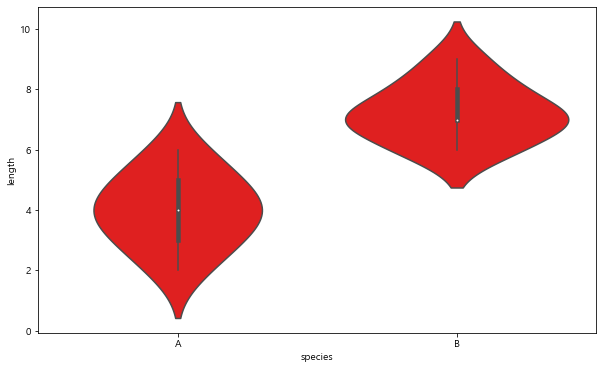

In [251]:
sns.violinplot(x='species',y='length',
              data = fm1, color= 'red')

In [ ]:
# Q. fish_multi에서 이상치를 제거한 후 바이올린 플롯을 표현하세요.

In [230]:
fm1 = fish_multi[fish_multi.species=='A']['length']
fm2 = fish_multi[fish_multi.species=='B']['length']

print(fm1.describe())
print(fm2.describe())
iqr = 5 - 2
uw_check = 5 + 1.5*iqr
print(uw_check)
st = np.sort(fm1)[::-1] #내림차순
print('이상치: {}'.format(st[st>uw_check]))
print()
iqr = 7.75 - 6.25
lw_check = 6.25-1.5*iqr
print(lw_check)
st = np.sort(fm2) #오름차순
print('이상치: {}'.format(st[st<lw_check]))

count     9.000000
mean      4.666667
std       2.345208
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: length, dtype: float64
count    9.000000
mean     6.333333
std      2.549510
min      2.000000
25%      7.000000
50%      7.000000
75%      8.000000
max      9.000000
Name: length, dtype: float64
9.5
이상치: [10]

4.0
이상치: [2 2]


In [233]:
st = np.sort(fm1)[::-1]
st

array([10,  6,  5,  5,  4,  4,  3,  3,  2], dtype=int64)

In [234]:
st1 = np.sort(fm2)
st1

array([2, 2, 7, 7, 7, 7, 8, 8, 9], dtype=int64)

In [235]:
index_fm = fish_multi[((fish_multi.length==10) & (fish_multi.species =='A')) | \
                      ((fish_multi.length==2) & (fish_multi.species =='B'))].index

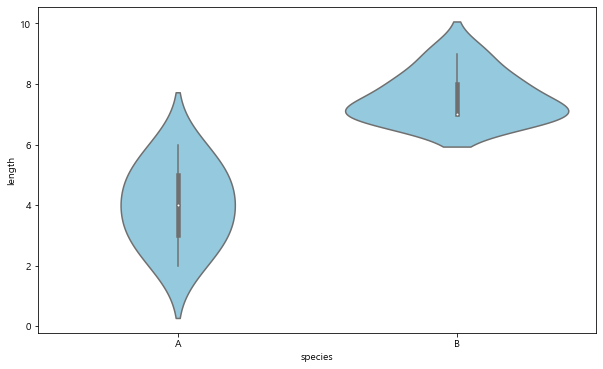

In [236]:
fm2 = fish_multi.drop(index_fm)
fm2
sns.violinplot(x='species',y='length',
              data = fm2, color= 'skyblue')

In [253]:
cov_data = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_cov.csv')

In [254]:
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


# 다차원 데이터¶
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

1.분석하고자 하는 데이터가 모두 실수 값인 경우
2.분석하고자 하는 데이터가 모두 카테고리 값인 경우
3.분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html#id4

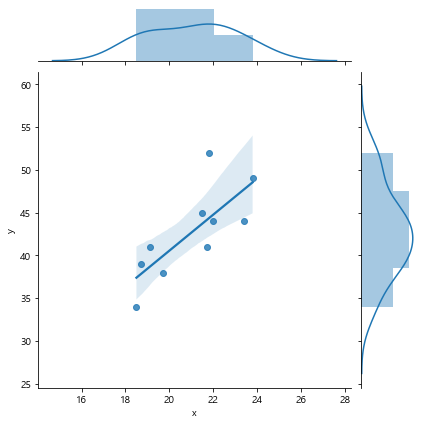

In [255]:
# fig = plt.figure(figsize=(3,2))
sns.jointplot(cov_data.x, cov_data.y, kind='reg')
#              joint_kws={'color':'blue'},
#              marginal_kws={'color':'red'})

In [257]:
df_auto = pd.read_excel('C:/caba2012/workspace/Caba_시각화/dataset/auto-mpg.xlsx')

In [258]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


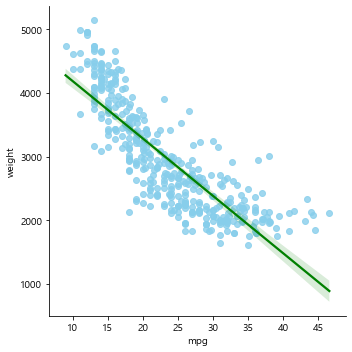

In [259]:
#lmplot: 각 데이터셋의 분포와 회귀선을 시각화해줌
sns.lmplot(x='mpg', y='weight', data=df_auto, scatter_kws={'color':'skyblue'}, 
           line_kws={'color': 'green'})

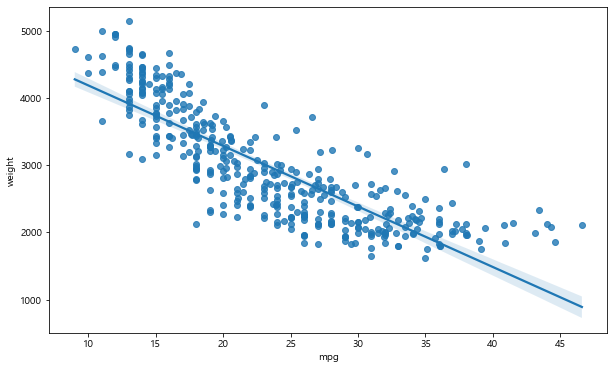

In [260]:
# regplot: scatter plot(분포)과 line plot을 함께 볼 수 있는 데이터 시각화 방법입니다.
sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=True)

<Figure size 720x432 with 0 Axes>

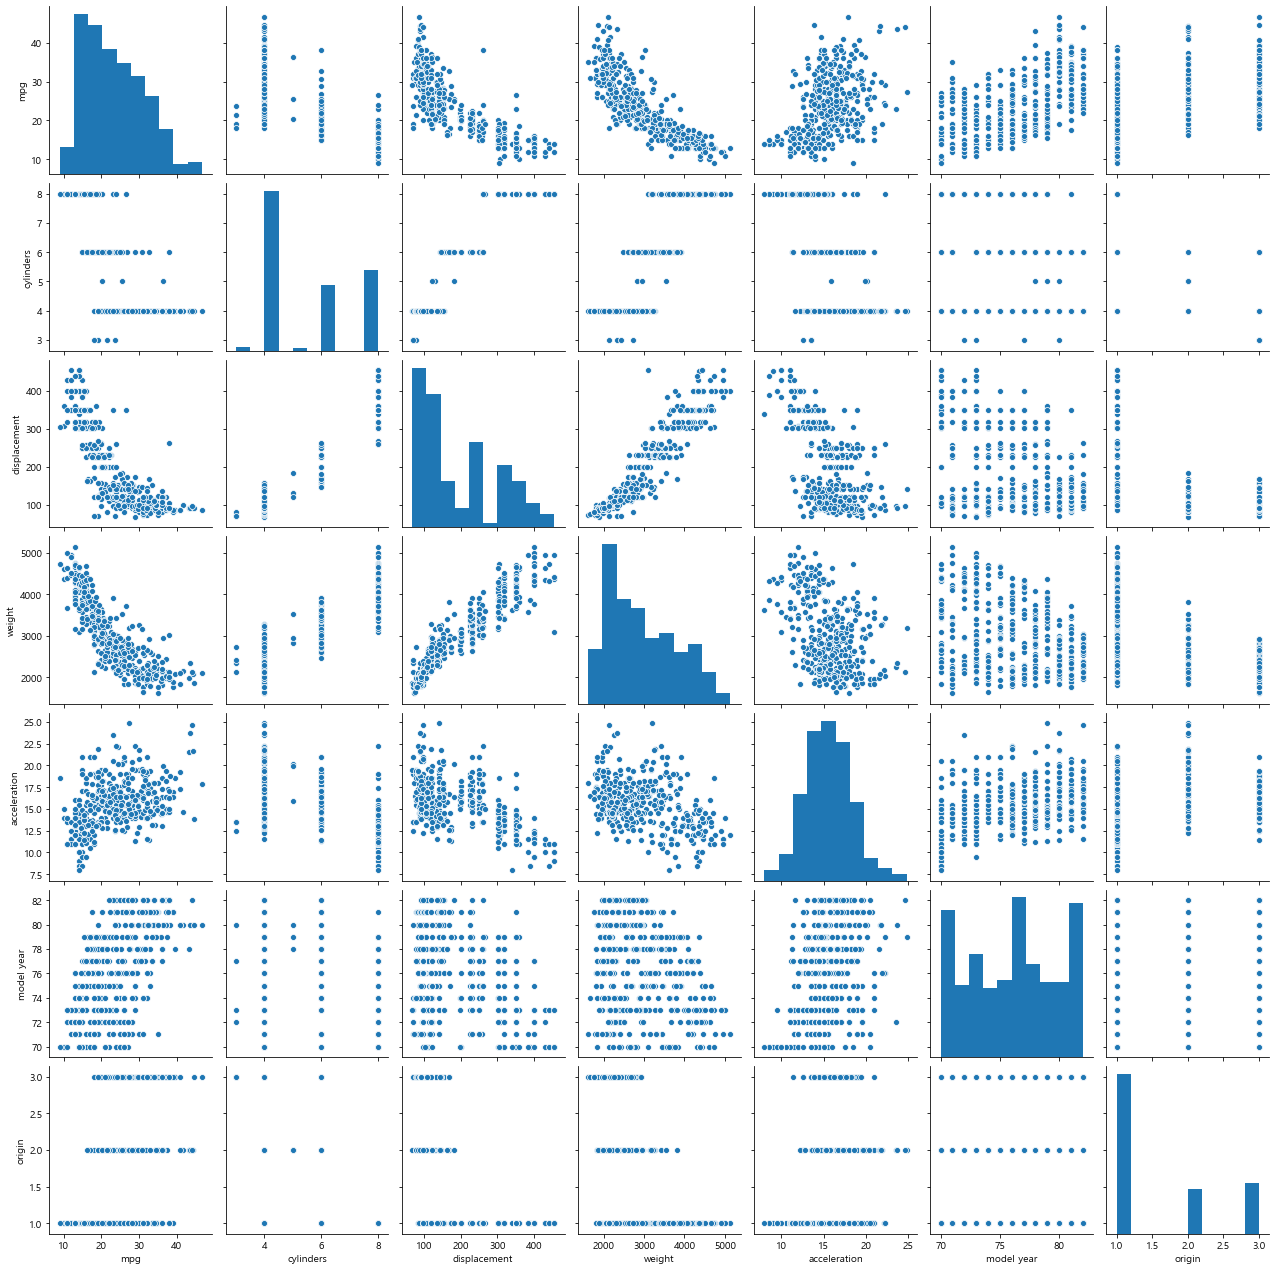

In [264]:
# 그래프가 너무 작은데, 크게 보는 법?
fig = plt.figure(figsize=(10,6))
sns.pairplot(df_auto, palette='gray')

In [265]:
t_df = sns.load_dataset('titanic')
t_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Text(0.5, 1, 'Heatmap of the Dataset')

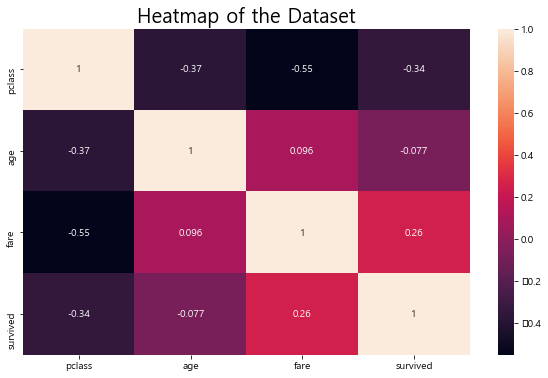

In [268]:
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

Text(0.5, 1, 'Heatmap of the Dataset')

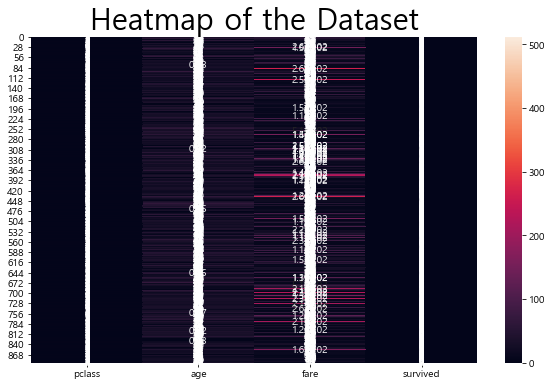

In [267]:
sns.heatmap(t_df[['pclass', 'age', 'fare', 'survived']], annot=True)
plt.title('Heatmap of the Dataset', fontsize=30)

In [271]:
table = t_df.pivot_table(index=['sex'], columns=['class'], values=['survived'],
                         aggfunc = 'mean')

table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

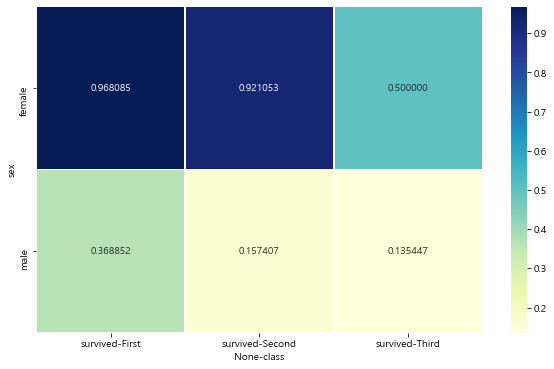

In [272]:
sns.heatmap(table, annot=True, fmt='f', cmap='YlGnBu', linewidth=.5, cbar=True)

In [273]:
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

In [274]:
fish_data

array([ 5,  7,  9,  1,  5,  6,  6,  2,  4,  4,  5,  6,  7,  3,  8, 10])

In [ ]:
# Q. fish_data로 다음을 수행하세요.
- 히스토그램을 표현하세요
- 밀도 그래프를 표현하세요
- 히스토그램과 커널밀도함수를 그래프로 같이 표현하세요.

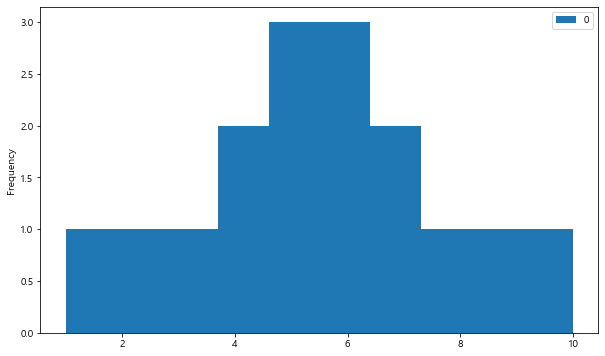

In [275]:
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])
df = pd.DataFrame(fish_data)
df.plot(kind='hist')

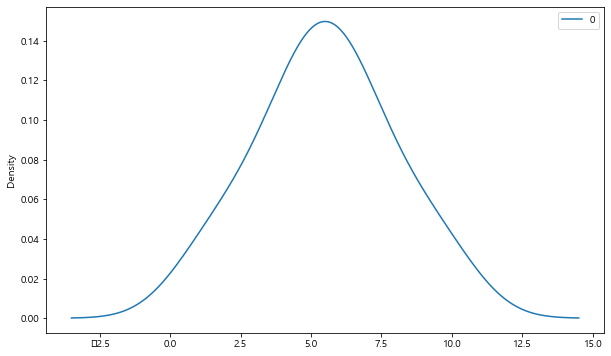

In [276]:
df.plot.density()

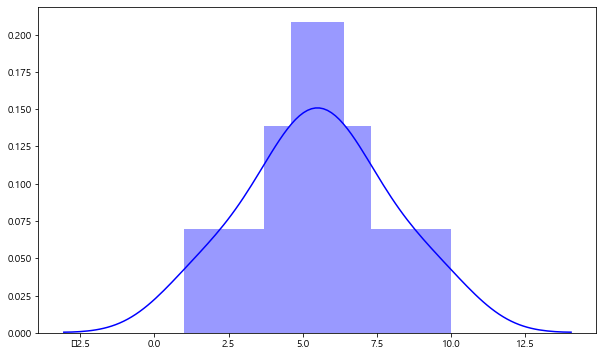

In [277]:
sns.distplot(fish_data, bins=10, color='blue',kde=True)

In [278]:
#버전문제인가
sns.histplot(fish_data,color='blue',kde=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [ ]:
# Q. subplot 사용 밀도있는 그래프와 없는 그래프를 같이 표현하세요.

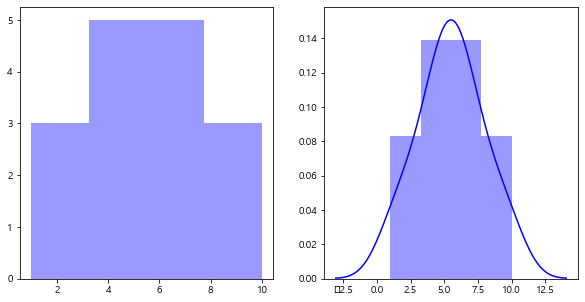

In [281]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(fish_data, color='blue', kde=False, ax=ax1)
sns.distplot(fish_data, color='blue', kde=True, ax=ax2)

In [ ]:
# Q.'dataset/4_fm2.csv'를 데이터프레임으로 불러와서 아래와 같이 Box Plot을 표현하세요.

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
df = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv')

In [284]:
df

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [134]:
df_f = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv')

In [ ]:
# 한글 폰트 오류 확인
# from matplotlib import font_manager, rc
# font_path = "dataset/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

Text(0.5, 1.0, 'Species별 length 분포(수평 박스 플롯)')

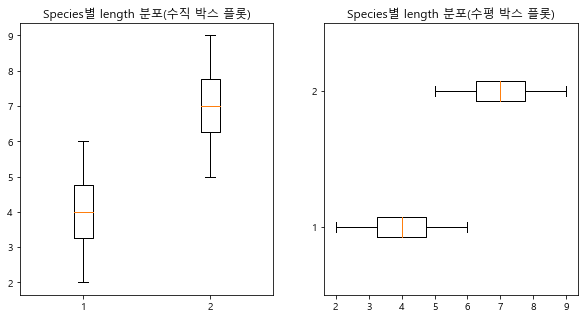

In [285]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']])
ax2.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']],vert=False)
ax1.set_title('Species별 length 분포(수직 박스 플롯)')
ax2.set_title('Species별 length 분포(수평 박스 플롯)')

In [287]:
data = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/FIFA.csv', encoding='cp949')

In [288]:
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [ ]:
# Q. 'Preferred Foot'의 빈도를 표시하는 막대 그래프를 표현하세요.

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

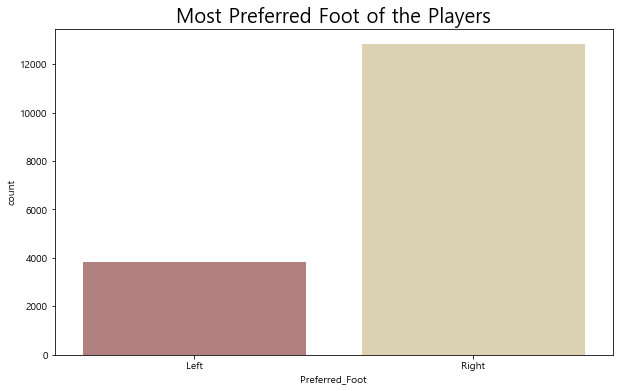

In [292]:
import warnings
warnings.filterwarnings('ignore')
data.columns
data['Preferred_Foot'].value_counts()
sns.countplot(data['Preferred_Foot'],palette='pink')
plt.title('Most Preferred Foot of the Players', fontsize=20)

In [ ]:
# sns.barplot(x="day", y="total_bill", data=tips)
# plt.title("요일 별, 전체 팁")
# plt.show()

In [299]:
data['Preferred_Foot'].value_counts()

Right    12822
Left      3820
Name: Preferred_Foot, dtype: int64

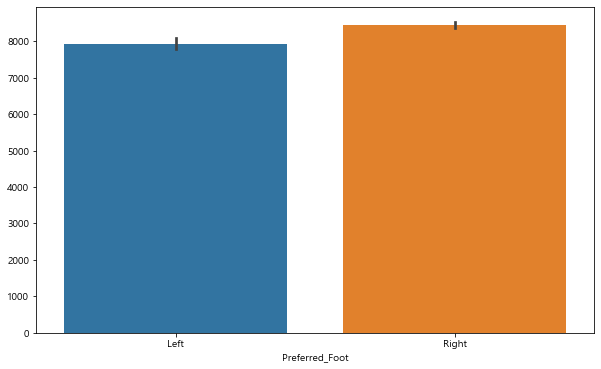

In [298]:
# 왜 barplot으로 안그려지지..?
sns.barplot(x='Preferred_Foot', y=data.index ,data=data)

Text(0.5, 1.0, 'Comparison of Positions and Players')

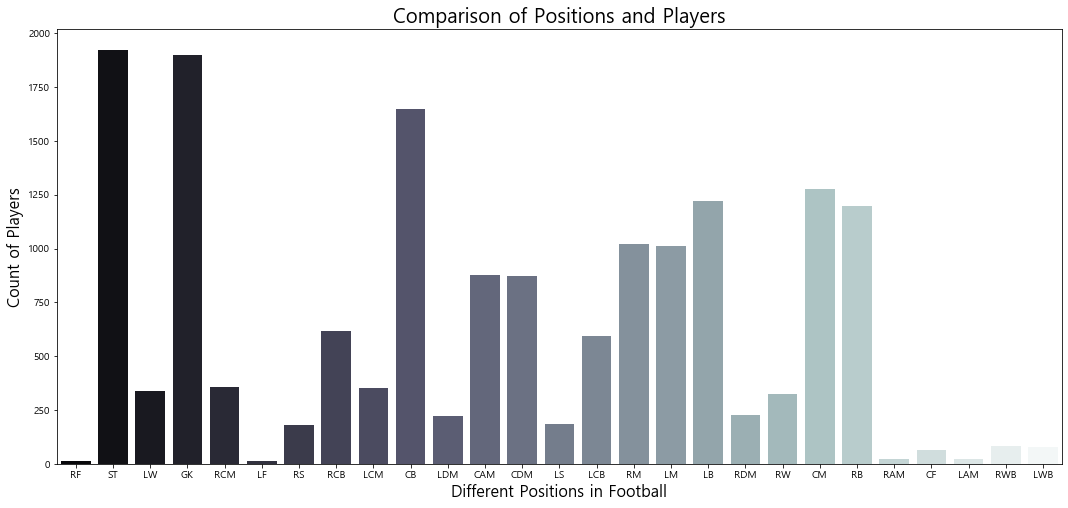

In [301]:
# Different position in Football
data.Position.value_counts()
plt.figure(figsize=(18,8))

#countplot
ax = sns.countplot('Position', data=data, palette ='bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)

ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)

In [ ]:
# Q. weight 칼럼의 값들에서 닥위를 삭제하고 숫자만 추출

In [ ]:
# 사용자 정의 함수?
# 사용자가 만든 함수

In [303]:
# csv로 읽어오신 경우
def add_value_to(value):
    out = str(value)+'lbs'
    return out

data.Weight_lb = data.Weight_lb.apply(lambda x: add_value_to(x))
data.Weight_lb.head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight_lb, dtype: object

In [304]:
#lbs제거
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)
data.Weight_lb = data.Weight_lb.apply(lambda x:  extract_value_from(x))
data.Weight_lb.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight_lb, dtype: float64

In [305]:
data.Weight_lb.unique()

array([159., 183., 150., 168., 154., 163., 146., 190., 181., 192., 176.,
       172., 148., 165., 196., 161., 187., 212., 170., 203., 157., 185.,
       130., 174., 207., 134., 141., 152., 179., 132., 201., 198., 209.,
       214., 143., 205., 137., 194., 216., 139., 220., 126., 218., 123.,
       128., 223., 121., 115., 117., 236., 229., 243., 225., 227., 110.,
       119., 234.])

In [ ]:
# 번외문제
# Q. Weight 칼럼의 값들에서 무게 단위인 'lbs'를 삭제하고 소수점 둘째자리의 숫자로 변환하세요.

In [306]:
format = lambda x: '%.2f' %x

In [307]:
data.Weight_lb.apply(format)

0        159.00
1        183.00
2        150.00
3        168.00
4        154.00
          ...  
16637    134.00
16638    170.00
16639    148.00
16640    154.00
16641    176.00
Name: Weight_lb, Length: 16642, dtype: object

In [ ]:
# Q. Wage 칼럼의 값을 아래와 같이 변환하세요.
# €565K -> 565000.0